#  Lets identify digits from thousands of hand written numbers!

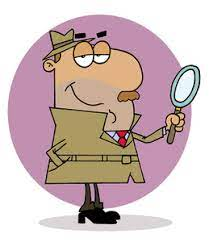

# Import all required libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.manifold import MDS, TSNE

import tensorflow as tf
from tensorflow import keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import  backend as K
from keras.optimizers import Adam ,RMSprop

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing train and test data

In [ ]:
train =  pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train.head()

In [ ]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test.head()

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = keras.utils.to_categorical(Y_train, 10)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(X_train[27].reshape(28,28), ax)

# Testing the data

In [ ]:
batch_size = 86
num_classes = 10
epochs = 10
input_shape = (28, 28, 1)

In [ ]:
'''#there are more 1 image samples
sns.barplot(x = y_train.unique(), y=y_train.value_counts())
plt.xlabel('Digits')
plt.ylabel('Number of image samples')'''

In [ ]:
batch_size = 86
num_classes = 10
epochs = 10
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
mnist_test = pd.read_csv("../input/mnist-in-csv/mnist_test.csv")
mnist_train = pd.read_csv("../input/mnist-in-csv-train/mnist_train.csv")

In [ ]:
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
train = pd.read_csv("../input/digit-recognizer/train.csv")

In [ ]:
cols = test.columns

In [ ]:
test['dataset'] = 'test'

In [ ]:
train['dataset'] = 'train'

In [ ]:
dataset = pd.concat([train.drop('label', axis=1), test]).reset_index()

In [ ]:
mnist = pd.concat([mnist_train, mnist_test]).reset_index(drop=True)
labels = mnist['label'].values
mnist.drop('label', axis=1, inplace=True)
mnist.columns = cols

In [ ]:
idx_mnist = mnist.sort_values(by=list(mnist.columns)).index
dataset_from = dataset.sort_values(by=list(mnist.columns))['dataset'].values
original_idx = dataset.sort_values(by=list(mnist.columns))['index'].values

In [ ]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_images = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

#extract the label value from the training dataset, not required from test data as labels are not given for this test dataset
train_label = np.array(train['label'])
train_images = train.drop('label', axis=1)

#training dataset is in 784 pixels which needs to be reshaped usign the re-shape function
train_images_arr = np.array(train_images).reshape(42000,28,28)
test_images_arr = np.array(test_images).reshape(28000,28,28)

plt.figure(figsize =(9,9))
for i in range(20):
    plt.subplot(5,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_arr[i])
    plt.xlabel(train_label[i])

# Making the submission

In [ ]:
for i in range(len(idx_mnist)):
    if dataset_from[i] == 'test':
        sample_submission.loc[original_idx[i], 'Label'] = labels[idx_mnist[i]]

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('submission.csv', index=False)

# If you like this notebook, please give an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Countries Life Expectancy Animation](https://www.kaggle.com/brendan45774/countries-life-expectancy-animation)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting Started with Manifold Learning - Isomap](https://www.kaggle.com/brendan45774/getting-started-with-manifold-learning-isomap)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [Guide to Matplotlib Image](https://www.kaggle.com/brendan45774/guide-to-matplotlib-image)
* [HOG features - Histogram of Oriented Gradients](https://www.kaggle.com/brendan45774/hog-features-histogram-of-oriented-gradients)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [K-Means Clustering (Image Compression)](https://www.kaggle.com/brendan45774/k-means-clustering-image-compression)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Topic Modeling (LDA)](https://www.kaggle.com/brendan45774/topic-modeling-lda)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)